# Demo of Detailed Voxels for Vegetation Modelling

Notebook: Hannah Weiser & Sina Zumstein, 2023

This demo simulation demonstrates the different `detailedVoxel` options for modelling vegetation using a single tree scene. We perform both virtual UAV-borne laser scanning (ULS) and airborne laser scanning (ALS). We will use the command-line access of HELIOS++ to run the simulation, and use Python just for displaying the input XMLs and the resulting point clouds.



In [1]:
import sys, os
from pathlib import Path
from IPython.display import Code

current_folder = globals()["_dh"][0]
helios_path = str(Path(current_folder).parent)
sys.path.append(helios_path)  # add helios-plusplus directory to PATH
import pyhelios

from pyhelios.util.xmldisplayer import display_xml, find_playback_dir
os.chdir(helios_path)

## Survey
Let us look at the XML files in the simulation. First, we investigate the survey XML files. We will start with the `uls_detailedVoxels_mode_comparison.xml`:

In [2]:
Code(display_xml(r'data\surveys\voxels\uls_detailedVoxels_mode_comparison.xml'), language='XML')

<document>

    <survey name="uls_detailed_voxel_modes" seed="42" scene="data/scenes/voxels/detailedVoxels_mode_comparison.xml#F_BR08" platform="data/platforms.xml#copter_linearpath" scanner="data/scanners_als.xml#riegl_vux-1uav">
	<FWFSettings beamSampleQuality="3" binSize_ns="0.25" maxFullwaveRange_ns="100" winSize_ns="1" />
		
		
		<leg>
			<platformSettings x="-30" y="-30" z="50" onGround="false" movePerSec_m="5" />
			<scannerSettings active="true" pulseFreq_hz="100000" scanAngle_deg="90" scanFreq_hz="50" headRotatePerSec_deg="0.00" trajectoryTimeInterval_s="0.01" />
		</leg>
		
		<leg>
			<platformSettings x="-30" y="30" z="50" onGround="false" movePerSec_m="5" />
			<scannerSettings active="false" pulseFreq_hz="100000" scanAngle_deg="90" scanFreq_hz="50" headRotatePerSec_deg="0.00" trajectoryTimeInterval_s="0.01" />
		</leg>
		
		<leg>
			<platformSettings x="0" y="30" z="50" onGround="false" movePerSec_m="5" />
			<scannerSettings active="true" pulseFreq_hz="100000" scanAngle_deg="90" scanFreq_hz="50" headRotatePerSec_deg="0.00" trajectoryTimeInterval_s="0.01" />
		</leg>
		
		<leg>
			<platformSettings x="0" y="-30" z="50" onGround="false" movePerSec_m="5" />
			<scannerSettings active="false" pulseFreq_hz="100000" scanAngle_deg="90" scanFreq_hz="50" headRotatePerSec_deg="0.00" trajectoryTimeInterval_s="0.01" />
		</leg>
		
		<leg>
			<platformSettings x="30" y="-30" z="50" onGround="false" movePerSec_m="5" />
			<scannerSettings active="true" pulseFreq_hz="100000" scanAngle_deg="90" scanFreq_hz="50" headRotatePerSec_deg="0.00" trajectoryTimeInterval_s="0.01" />
		</leg>
		
		<leg>
			<platformSettings x="30" y="30" z="50" onGround="false" movePerSec_m="5" />
			<scannerSettings active="false" pulseFreq_hz="100000" scanAngle_deg="90" scanFreq_hz="50" headRotatePerSec_deg="0.00" trajectoryTimeInterval_s="0.01" />
		</leg>
		
		<leg>
			<platformSettings x="30" y="30" z="50" onGround="false" movePerSec_m="5" />
			<scannerSettings active="true" pulseFreq_hz="100000" scanAngle_deg="90" scanFreq_hz="50" headRotatePerSec_deg="0.00" trajectoryTimeInterval_s="0.01" />
		</leg>
		
		<leg>
			<platformSettings x="-30" y="30" z="50" onGround="false" movePerSec_m="5" />
			<scannerSettings active="false" pulseFreq_hz="100000" scanAngle_deg="90" scanFreq_hz="50" headRotatePerSec_deg="0.00" trajectoryTimeInterval_s="0.01" />
		</leg>
		
		<leg>
			<platformSettings x="-30" y="0" z="50" onGround="false" movePerSec_m="5" />
			<scannerSettings active="true" pulseFreq_hz="100000" scanAngle_deg="90" scanFreq_hz="50" headRotatePerSec_deg="0.00" trajectoryTimeInterval_s="0.01" />
		</leg>
		
		<leg>
			<platformSettings x="30" y="0" z="50" onGround="false" movePerSec_m="5" />
			<scannerSettings active="false" pulseFreq_hz="100000" scanAngle_deg="90" scanFreq_hz="50" headRotatePerSec_deg="0.00" trajectoryTimeInterval_s="0.01" />
		</leg>
		
		<leg>
			<platformSettings x="30" y="-30" z="50" onGround="false" movePerSec_m="5" />
			<scannerSettings active="true" pulseFreq_hz="100000" scanAngle_deg="90" scanFreq_hz="50" headRotatePerSec_deg="0.00" trajectoryTimeInterval_s="0.01" />
		</leg>
		
		<leg>
			<platformSettings x="-30" y="-30" z="50" onGround="false" movePerSec_m="5" />
			<scannerSettings active="false" pulseFreq_hz="100000" scanAngle_deg="90" scanFreq_hz="50" headRotatePerSec_deg="0.00" trajectoryTimeInterval_s="0.01" />
		</leg>

    </survey>
</document>

Here we see 12 `leg` elements which define the waypoints of the trajectory of the platform (`copter_linearpath` UAV) and the speed between these waypoints (`movePerSec_m`). As the scanner is not active between all waypoints, this survey definition results in six flight strips.
For each `leg`, the `scannerSettings` such as pulse frequency (`pulseFreq_hz`), scan angle (`scanAngle_deg`) and scan frequency (`scanFreq_hz`) are specified.

Let's also have a quick look at the survey XML file of the ALS simulation `als_detailedVoxels_mode_comparison.xml`:

In [3]:
Code(display_xml(r'data\surveys\voxels\als_detailedVoxels_mode_comparison.xml'), language='XML')

<document>

    <survey name="als_detailed_voxel_modes" seed="42" scene="data/scenes/voxels/detailedVoxels_mode_comparison.xml#F_BR08" platform="data/platforms.xml#sr22" scanner="data/scanners_als.xml#riegl_lms-q780">
	<FWFSettings beamSampleQuality="3" binSize_ns="0.25" maxFullwaveRange_ns="100" winSize_ns="1" />
		
		
		<leg>
			<platformSettings x="-145" y="50" z="500" onGround="false" movePerSec_m="50" />
			<scannerSettings active="true" pulseFreq_hz="100000" scanAngle_deg="30" scanFreq_hz="200" headRotatePerSec_deg="0.00" headRotateStart_deg="0.00" headRotateStop_deg="0.00" trajectoryTimeInterval_s="0.05" />
		</leg>
		
		<leg>
			<platformSettings x="-145" y="-50" z="500" onGround="false" movePerSec_m="50" />
			<scannerSettings active="false" pulseFreq_hz="100000" scanAngle_deg="30" scanFreq_hz="200" headRotatePerSec_deg="0.00" headRotateStart_deg="0.00" headRotateStop_deg="0.00" trajectoryTimeInterval_s="0.05" />
		</leg>
		
		<leg>
			<platformSettings x="145" y="-50" z="500" onGround="false" movePerSec_m="50" />
			<scannerSettings active="true" pulseFreq_hz="100000" scanAngle_deg="30" scanFreq_hz="200" headRotatePerSec_deg="0.00" headRotateStart_deg="0.00" headRotateStop_deg="0.00" trajectoryTimeInterval_s="0.05" />
		</leg>
		
		<leg>
			<platformSettings x="145" y="50" z="500" onGround="false" movePerSec_m="50" />
			<scannerSettings active="false" pulseFreq_hz="100000" scanAngle_deg="30" scanFreq_hz="200" headRotatePerSec_deg="0.00" headRotateStart_deg="0.00" headRotateStop_deg="0.00" trajectoryTimeInterval_s="0.05" />
		</leg>

    </survey>
</document>

Here we have only four `leg` elements which define the waypoints of the trajectory of the platform (`sr22` airplane) and the speed between these waypoints (`movePerSec_m`). As the scanner is only active between the first and second waypoint, and the third and fourth waypoint, this results in two flight strips.
In comparison to the ULS survey, the aircraft flies higher (500 m altitude instead of 50 m) and faster (50 m/s instead of 5 m/s).

Now we will continue having a closer look at the ULS demo and compare its output point clouds to those of the ALS demo at the end.

## Scanner

Next we will have a look at the scanner that is placed on the platform. Here it is the `riegl_vux-1uav` defined in `data/scanners_als.xml` as shown in the survey XML.

In [4]:
Code(display_xml(r'data/scanners_als.xml', 'riegl_vux-1uav'), language='XML')

<scanner id="riegl_vux-1uav" accuracy_m="0.01" beamDivergence_rad="0.0005" name="RIEGL VUX-1UAV" optics="rotating" pulseFreqs_Hz="50000,100000,200000,300000,380000,550000" pulseLength_ns="4" rangeMin_m="3" scanAngleMax_deg="180" scanAngleEffectiveMax_deg="165" scanFreqMin_Hz="10" scanFreqMax_Hz="200">
		
			<beamOrigin x="0" y="0.085" z="0.06">			
				<rot axis="x" angle_deg="90" />			
				<rot axis="z" angle_deg="90" />			
			</beamOrigin>
		<headRotateAxis x="0" y="0" z="1" />
	</scanner>

Here we can see the scanner-specific settings, for example the `beamDivergence_rad`, the `accuracy` or the possible pulse frequencies (`pulseFreq_Hz`). This scanner has a rotating beam deflector (`optics`).

Without any rotations applied to the `scannerMount` in the platform XML or the `beamOrigin` in the scanner XML, scanners in HELIOS would face towards to Y-axis (forward) and scan in vertical scan lines (in the plane created by the Y- and Z-axis), see also [Platforms#rotations](https://github.com/3dgeo-heidelberg/helios/wiki/Platforms#rotations) in the Wiki.

Looking at the `beamOrigin`, we see that the scanner is pointed upwards and scans left-to-right. This is not how it will behave in the end. For this, we also have to have a look at the `scannerMount` at platform level.

## Platform

In [5]:
Code(display_xml(r'data/platforms.xml', 'copter_linearpath'))

<platform id="copter_linearpath" name="Quadrocopter UAV" type="linearpath">
		<scannerMount x="0" y="0" z="0.2">
			<rot axis="x" angle_deg="175" />
		</scannerMount>
		
	</platform>

This is a `linearpath` type platform, a mobile platform which moves in a straight line between consecutive legs with a constant speed provided by the user.

We saw earlier, that the scanner is pointing upwards (and scanning left-to-right). Using the `scannerMount`, the platform is now rotated around the x axis by 175°, resulting in a 5° tilt back off-nadir. This way, we simulate the forward pitch of multirotor drones when heading forwards.

# Scene
Now we will have a look at the scene, `detailedVoxels_mode_comparison.xml` in `data/scenes/voxels/detailedVoxels_mode_comparison.xml`:

In [6]:
Code(display_xml(r'data/scenes/voxels/detailedVoxels_mode_comparison.xml', 'F_BR08'))

<scene id="F_BR08" name="syssifoss F_BR08">
        <part>
            <filter type="objloader">
                <param type="string" key="filepath" value="data/sceneparts/basic/groundplane/groundplane.obj" />
            </filter>
            <filter type="scale">
                <param type="double" key="scale" value="15" />
            </filter>
        </part>
		

		
		<part>
            <filter type="objloader">
                <param type="string" key="filepath" value="data/sceneparts/syssifoss/F_BR08_08_stem_Poisson.obj" />
            </filter>
			<filter type="translate">
				<param type="vec3" key="offset" value="-22;+15;-241.401000" />
			</filter>
        </part>
		<part>
			<filter type="detailedvoxels">
				<param type="string" key="intersectionMode" value="fixed" />
				<param type="string" key="filepath" value="data/sceneparts/syssifoss/F_BR08_08_crown_250.vox" />
				<param type="string" key="matfile" value="data/sceneparts/syssifoss/tree.mtl" />
				<param type="string" key="matname" value="needles" />
			</filter>
			<filter type="translate">
				<param type="vec3" key="offset" value="-22;+15;-241.401000" />
			</filter>
		</part>
		
		
		
		<part>
            <filter type="objloader">
                <param type="string" key="filepath" value="data/sceneparts/syssifoss/F_BR08_08_stem_Poisson.obj" />
            </filter>
			<filter type="translate">
				<param type="vec3" key="offset" value="-17;+15;-241.401000" />
			</filter>
        </part>
		<part>
			<filter type="detailedvoxels">
				<param type="string" key="intersectionMode" value="fixed" />
				<param type="string" key="filepath" value="data/sceneparts/syssifoss/F_BR08_08_crown_50.vox" />
				<param type="string" key="matfile" value="data/sceneparts/syssifoss/tree.mtl" />
				<param type="string" key="matname" value="needles" />
			</filter>
			<filter type="translate">
				<param type="vec3" key="offset" value="-17;+15;-241.401000" />
			</filter>
		</part>
		
		
		 
		<part>
            <filter type="objloader">
                <param type="string" key="filepath" value="data/sceneparts/syssifoss/F_BR08_08_stem_Poisson.obj" />
            </filter>
			<filter type="translate">
				<param type="vec3" key="offset" value="-12;+15;-241.401000" />
			</filter>
        </part>
		<part>
			<filter type="detailedvoxels">
				<param type="string" key="filepath" value="data/sceneparts/syssifoss/F_BR08_08_merged.vox" />
				<param type="string" key="matfile" value="data/sceneparts/syssifoss/tree.mtl" />
				<param type="string" key="matname" value="needles" />
			</filter>
			<filter type="translate">
				<param type="vec3" key="offset" value="-12;+15;-241.401000" />
			</filter>
		</part>
		

		 
		<part>
            <filter type="objloader">
                <param type="string" key="filepath" value="data/sceneparts/syssifoss/F_BR08_08_stem_Poisson.obj" />
            </filter>
			<filter type="translate">
				<param type="vec3" key="offset" value="-2;+15;-241.401000" />
			</filter>
        </part>
		<part>
			<filter type="detailedvoxels">
				<param type="string" key="intersectionMode" value="scaled" />
				<param type="double" key="intersectionArgument" value="0.5" />
				<param type="string" key="filepath" value="data/sceneparts/syssifoss/F_BR08_08_merged.vox" />
				<param type="string" key="matfile" value="data/sceneparts/syssifoss/tree.mtl" />
				<param type="string" key="matname" value="needles" />
			</filter>
			<filter type="translate">
				<param type="vec3" key="offset" value="-2;+15;-241.401000" />
			</filter>
		</part>
		
		
		
		<part>
            <filter type="objloader">
                <param type="string" key="filepath" value="data/sceneparts/syssifoss/F_BR08_08_stem_Poisson.obj" />
            </filter>
			<filter type="translate">
				<param type="vec3" key="offset" value="-7;+15;-241.401000" />
			</filter>
        </part>
		<part>
			<filter type="detailedvoxels">
				<param type="string" key="intersectionMode" value="scaled" />
		

Here we see a scene consisting of a groundplane and five tree objects.
The stems of the trees are all loaded  with the `objloader` filter while the crown is loaded using `detailedVoxels` with different modes and paramters.

From left to right: 
- Fixed voxel size (25 cm)
- Fixed voxel size (5 cm)
- Transmittive voxels (25 cm)
- Scaled voxels by plant area density (25 cm)
- Scaled voxels by plant area density (25 cm) with a random shift of scaled voxels (within their voxel space)

Read more about the HELIOS++ voxel support on the [Scene page](https://github.com/3dgeo-heidelberg/helios/wiki/Scene#b-voxels) in the Wiki.

# Executing the Simulation 
Next, we will run the simulations for both surveys. In Jupyter Notebooks, we can run external commands with the !command syntax, but you can also just run it from the command line. We will run the ULS simulation first: 

In [7]:
!"run/helios.exe" data\surveys\voxels\uls_detailedVoxels_mode_comparison.xml -q
output_path_uls = find_playback_dir(r"data\surveys\voxels\uls_detailedVoxels_mode_comparison.xml")

In [8]:
!"run/helios.exe" data\surveys\voxels\als_detailedVoxels_mode_comparison.xml -q
output_path_als = find_playback_dir(r"data\surveys\voxels\als_detailedVoxels_mode_comparison.xml")

## The results 
Now we can display the 3D plots. First we will show the result of the ULS simulation and then compare it to the ALS simulation.

### 1) ULS point cloud

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from pathlib import Path

print("Loading points from", Path(output_path_uls).relative_to(helios_path).as_posix())

strip_1 = np.loadtxt(Path(output_path_uls) / 'leg000_points.xyz')
strip_2 = np.loadtxt(Path(output_path_uls) / 'leg002_points.xyz')
strip_3 = np.loadtxt(Path(output_path_uls) / 'leg004_points.xyz')
strip_4 = np.loadtxt(Path(output_path_uls) / 'leg006_points.xyz')
strip_5 = np.loadtxt(Path(output_path_uls) / 'leg008_points.xyz')
strip_6 = np.loadtxt(Path(output_path_uls) / 'leg010_points.xyz')

#stacking the strips 
strips= np.vstack((strip_1, strip_2, strip_3, strip_4, strip_5, strip_6))

traj_1_uls = np.loadtxt(Path(output_path_uls) / 'leg000_trajectory.txt')
traj_2_uls = np.loadtxt(Path(output_path_uls) / 'leg002_trajectory.txt')
traj_3_uls = np.loadtxt(Path(output_path_uls) / 'leg004_trajectory.txt')
traj_4_uls = np.loadtxt(Path(output_path_uls) / 'leg006_trajectory.txt')
traj_5_uls = np.loadtxt(Path(output_path_uls) / 'leg008_trajectory.txt')
traj_6_uls = np.loadtxt(Path(output_path_uls) / 'leg010_trajectory.txt')

Loading points from output/uls_detailed_voxel_modes/2023-02-02_11-47-38


In [10]:
def set_axes_equal(ax):
    '''Make axes of 3D plot have equal scale so that spheres appear as spheres,
    cubes as cubes, etc..  This is one possible solution to Matplotlib's
    ax.set_aspect('equal') and ax.axis('equal') not working for 3D.

    Input
      ax: a matplotlib axis, e.g., as output from plt.gca().
    '''

    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # The plot bounding box is a sphere in the sense of the infinity
    # norm, hence I call half the max range the plot radius.
    plot_radius = 0.5*max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius]) 
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

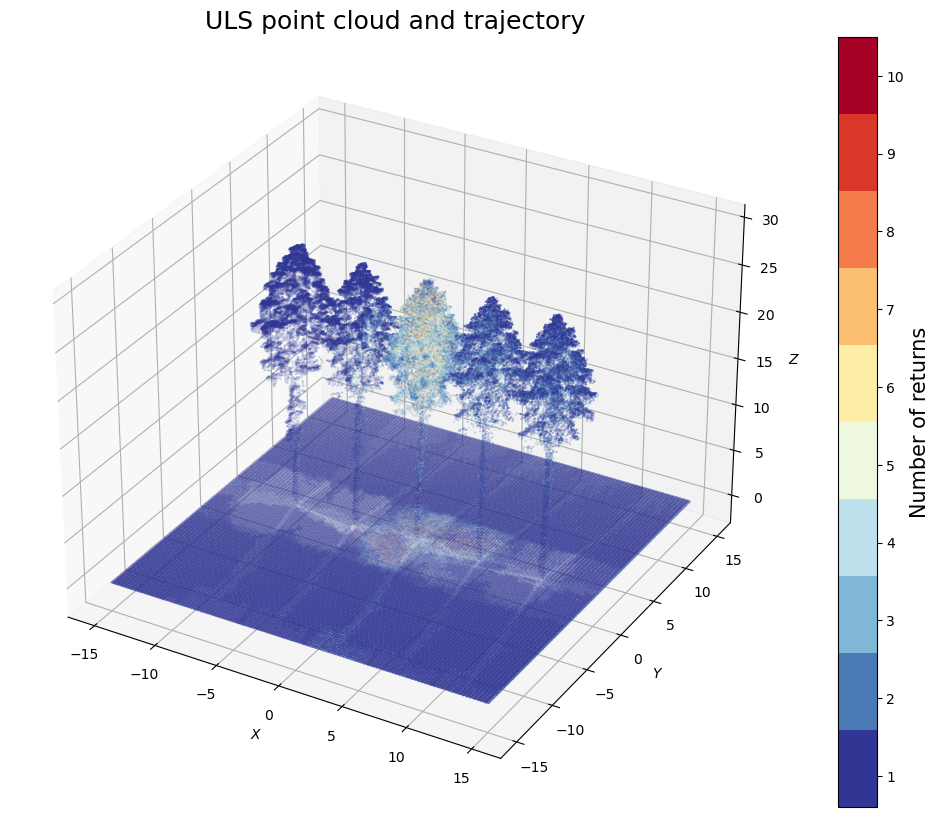

In [11]:
# Matplotlib figures.
fig = plt.figure(figsize=(15,10))


#settings for a discrete colorbar
N = int(np.max(strips[:, 6]))
cmap=plt.get_cmap('RdYlBu_r', N)
# Scatter plot (coloured by number of returns).
ax = fig.add_subplot(projection='3d')
sc = ax.scatter(strips[:, 0], strips[:, 1], strips[:, 2], c=strips[:, 6], cmap=cmap, s=0.02, label='scene')

# Add axis labels.
ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
ax.set_zlabel('$Z$')

set_axes_equal(ax)    

# Set title.
ax.set_title(label='ULS point cloud and trajectory',fontsize=18)

tick_locs = (np.arange(N+1) + 0.5)*(N)/(N+1)
cbar = plt.colorbar(sc, ticks=tick_locs)

cbar.set_label("Number of returns", fontsize=15)
tick_labels = [str(i) for i in range(N+1)]
cbar.ax.set_yticklabels(tick_labels)

# Display results
plt.show()

On the tree on the very left, we clearly see the outlines of the fairly large (25 cm) opaque voxels. Due to the large voxel size, the beams can barely penetrate into the canopy and generate mostly single returns at the surface of the outer voxels.

The second tree from the left already looks more realistic due to the finer voxel grid. Still, there are relatively little multiple returns.

The tree in the middle is using the "transmittive" mode, where we assume that each voxel is filled with randomly distributed infinitely small sized leaf scatterers ("turbid medium"). Each voxel has a leaf area density and a leaf angle distribution is defined for the entire crown. From this, the extinction coefficient $\sigma$ is calculated. Based on $\sigma$, we determine where and if a return is generated within the voxel using a stochastic model ([Scene#b-voxels](https://github.com/3dgeo-heidelberg/helios/wiki/Scene#b-voxels)).

The two trees on the right use opaque voxels again, but voxels are scaled, so that the voxel leaf area density is proportional to the scaled voxel cube area. This means that smaller voxel cubes are generated where leaf area density is low. While generated using a voxel grid of 25 cm (like for the first tree), the scaling results in a voxel model which the laser beam can penetrate into and hence more realistic point clouds and number of multiple returns.

For the scaled and the transmittive mode, it is necessary to first compute voxel-based leaf area density. HELIOS++ supports the output format of [AMAPVox](https://amapvox.org/) ([Vincent et al. 2017](https://doi.org/10.1016/j.rse.2017.05.034)), a LiDAR Voxelisation Software for the computation of transmittance and estimation of leaf area density. The python script [pyhelios/util/voxelizer_write_vox.py](https://github.com/3dgeo-heidelberg/helios/blob/dev/pyhelios/util/voxelizer_write_vox.py) can be used to generate a simple .vox file which can be used for the "fixed" mode. It voxelizes a point cloud with a given resolution and writes it into the HELIOS++-readable voxel file format.

### 2) ALS point cloud

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from pathlib import Path

print("Loading points from", Path(output_path_als).relative_to(helios_path).as_posix())

strip_1 = np.loadtxt(Path(output_path_als) / 'leg000_points.xyz')
strip_2 = np.loadtxt(Path(output_path_als) / 'leg002_points.xyz')

#stacking the strips 
strips = np.vstack((strip_1, strip_2))

traj_1_als = np.loadtxt(Path(output_path_als) / 'leg000_trajectory.txt')
traj_2_als = np.loadtxt(Path(output_path_als) / 'leg002_trajectory.txt')

Loading points from output/als_detailed_voxel_modes/2023-02-02_11-47-53


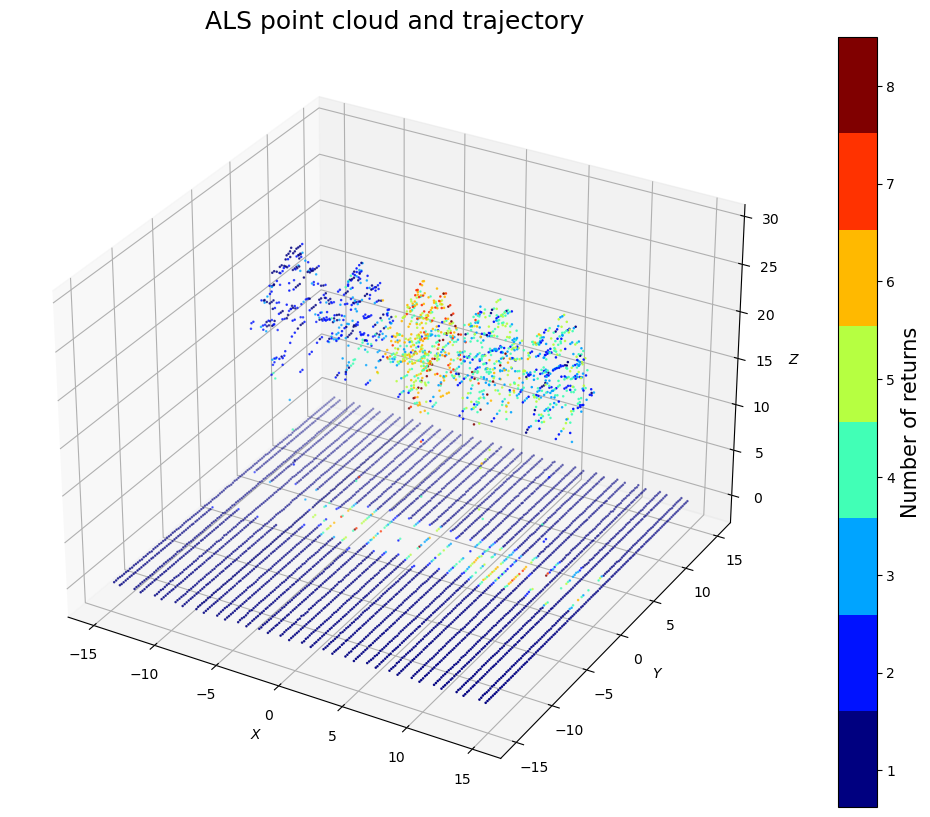

In [13]:
# Matplotlib figures.
fig = plt.figure(figsize=(15,10))


#settings for a discrete colorbar
N = int(np.max(strips[:, 6]))
cmap=plt.get_cmap('jet', N)
# Scatter plot (coloured by number of returns).
ax = fig.add_subplot(projection='3d')
sc = ax.scatter(strips[:, 0], strips[:, 1], strips[:, 2], c=strips[:, 6], cmap=cmap, s=0.7, label='scene')

# Add axis labels.
ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
ax.set_zlabel('$Z$')

set_axes_equal(ax)    

# Set title.
ax.set_title(label='ALS point cloud and trajectory',fontsize=18)

tick_locs = (np.arange(N+1) + 0.5)*(N)/(N+1)
cbar = plt.colorbar(sc, ticks=tick_locs)

cbar.set_label("Number of returns", fontsize=15)
tick_labels = [str(i) for i in range(N+1)]
cbar.ax.set_yticklabels(tick_labels)

# Display results
plt.show()

From the ALS point cloud, we notice smaller differences in the point clouds of the different tree voxel models. This suggests that when decreasing the spatial resolution of the scanning, we can often also decrease the resolution of the objects in the scene. However, note that for the number of returns (a proxy for crown penetration by the laser beam), there are still significant differences. This underlines the advantage of either small voxels (including scaled voxels, which require a lower number of voxels overall) or transmittive voxels.